In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [ ]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)

In [26]:
print(df)

          ID  LIMIT_BAL  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0          1      20000   24      2      2     -1     -1     -2     -2   
1          2     120000   26     -1      2      0      0      0      2   
2          3      90000   34      0      0      0      0      0      0   
3          4      50000   37      0      0      0      0      0      0   
4          5      50000   57     -1      0     -1      0      0      0   
...      ...        ...  ...    ...    ...    ...    ...    ...    ...   
29993  29994     100000   38      0     -1     -1      0      0      0   
29994  29995      80000   34      2      2      2      2      2      2   
29996  29997     150000   43     -1     -1     -1     -1      0      0   
29997  29998      30000   37      4      3      2     -1      0      0   
29999  30000      50000   46      0      0      0      0      0      0   

       BILL_AMT1  ...  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  \
0           3913  ...   True        Fals

In [28]:
print(df.shape)

(22794, 32)


In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22794 entries, 0 to 29999
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          22794 non-null  int64
 1   LIMIT_BAL                   22794 non-null  int64
 2   AGE                         22794 non-null  int64
 3   PAY_0                       22794 non-null  int64
 4   PAY_2                       22794 non-null  int64
 5   PAY_3                       22794 non-null  int64
 6   PAY_4                       22794 non-null  int64
 7   PAY_5                       22794 non-null  int64
 8   PAY_6                       22794 non-null  int64
 9   BILL_AMT1                   22794 non-null  int64
 10  BILL_AMT2                   22794 non-null  int64
 11  BILL_AMT3                   22794 non-null  int64
 12  BILL_AMT4                   22794 non-null  int64
 13  BILL_AMT5                   22794 non-null  int64
 14  BILL_AMT6  

In [ ]:
# Handle missing values
print("Missing values before cleaning:", df.isnull().sum().sum())
df = df.dropna()
print("Data shape after cleaning:", df.shape)

Missing values before cleaning: 0
Data shape after cleaning: (30000, 25)


In [ ]:
# Handle outliers using IQR for numerical features
numerical_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT6']

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]
    return df

df = remove_outliers_iqr(df, numerical_cols)
print("Data shape after outlier removal:", df.shape)

Data shape after outlier removal: (22794, 25)


In [ ]:
# Encode categorical variables
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [ ]:
# Handle class imbalance
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print("\nClass distribution after balancing:", pd.Series(y_res).value_counts())


Class distribution after balancing: default payment next month
1    17244
0    17244
Name: count, dtype: int64


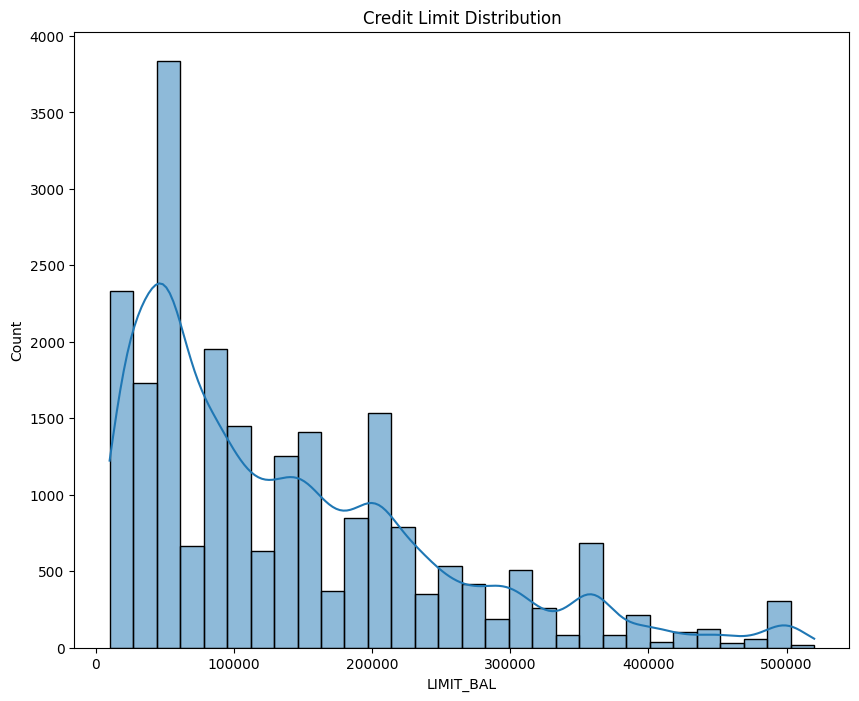

In [ ]:
# Distribution plots
plt.figure(figsize=(10,8))
sns.histplot(df['LIMIT_BAL'], bins=30, kde=True)
plt.title('Credit Limit Distribution')
plt.show()

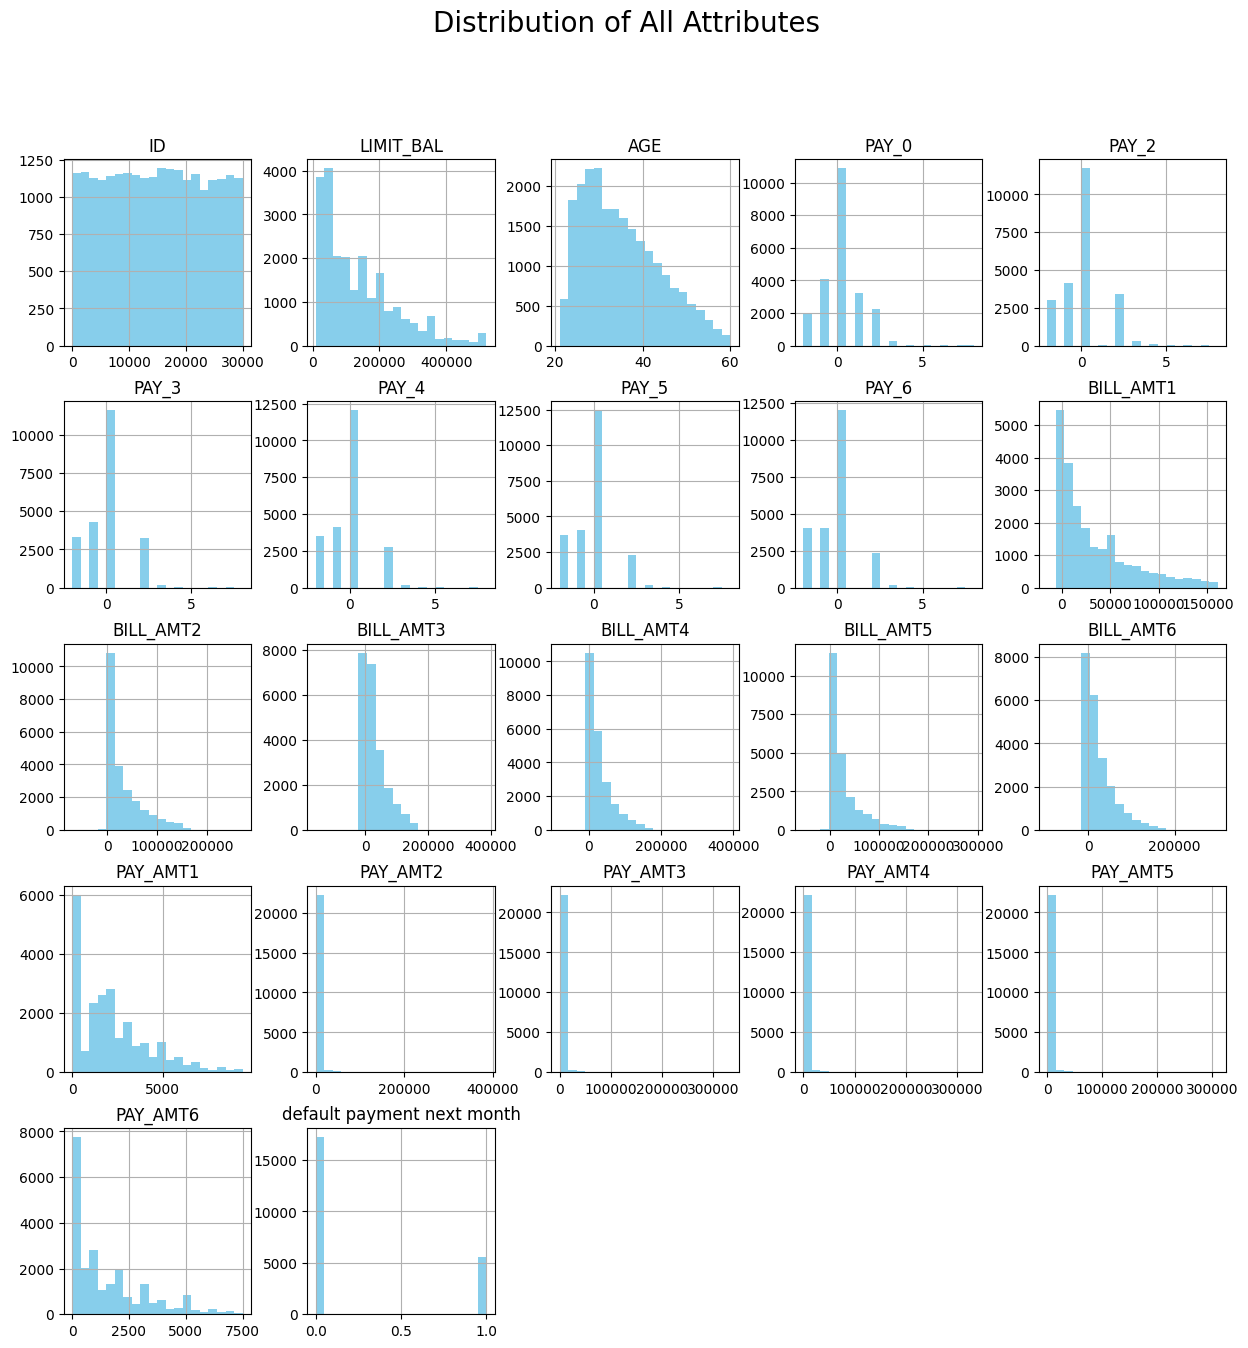

In [ ]:
df.hist(bins=20, figsize=(15, 15), color='skyblue')
plt.suptitle('Distribution of All Attributes', fontsize=20)
plt.show()


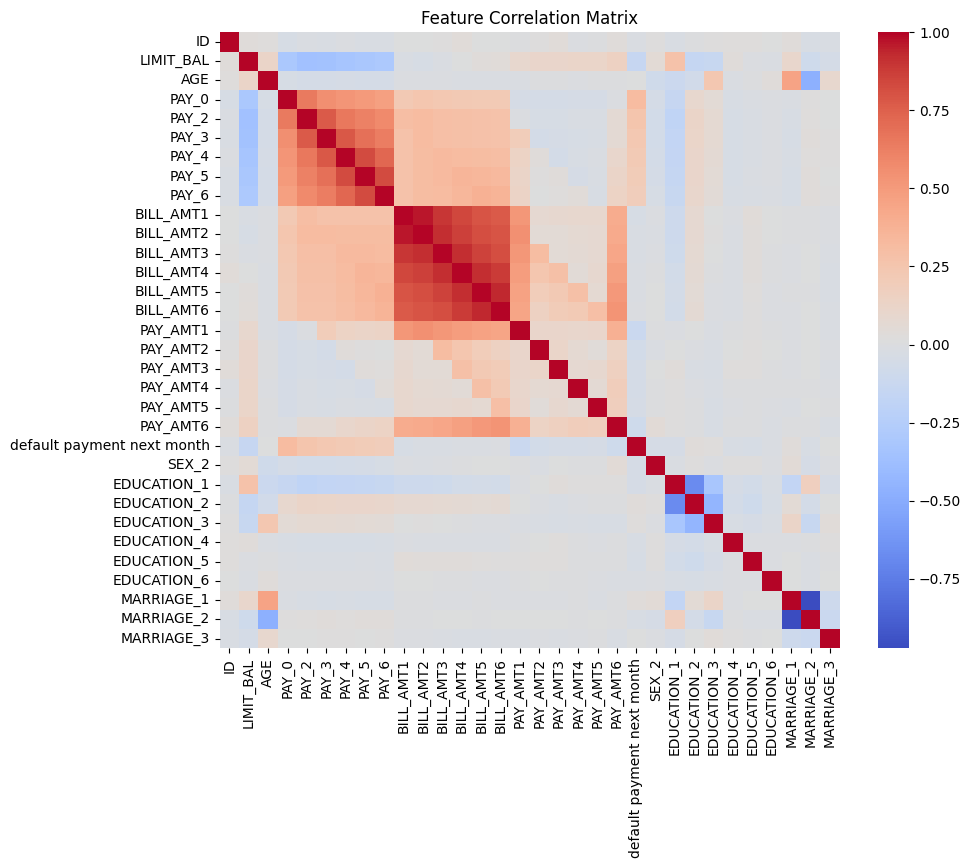

In [ ]:
# Correlation matrix
plt.figure(figsize=(10,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Model Training & Evaluation
# =================================================================
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred) * 100,
        'Precision': precision_score(y_test, y_pred) * 100,
        'Recall': recall_score(y_test, y_pred) * 100,
        'F1-Score': f1_score(y_test, y_pred) * 100
    }

    print(f"\n{model_name} Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}%")

    return metrics

In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
knn_metrics = evaluate_model(knn, X_test_scaled, y_test, "KNN")



KNN Evaluation Metrics:
Accuracy: 82.14%
Precision: 84.99%
Recall: 77.68%
F1-Score: 81.17%


In [ ]:
# Support Vector Machine
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
svm_metrics = evaluate_model(svm, X_test_scaled, y_test, "SVM")


SVM Evaluation Metrics:
Accuracy: 82.46%
Precision: 89.46%
Recall: 73.23%
F1-Score: 80.53%


In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
lr_metrics = evaluate_model(log_reg, X_test_scaled, y_test, "Logistic Regression")


Logistic Regression Evaluation Metrics:
Accuracy: 82.05%
Precision: 90.19%
Recall: 71.56%
F1-Score: 79.80%


In [ ]:
# Neural Network (MLP)
mlp = MLPClassifier(
    hidden_layer_sizes=(512, 256, 128),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    batch_size=50,
    max_iter=2000,
    random_state=42
)
mlp.fit(X_train_scaled, y_train)
mlp_metrics = evaluate_model(mlp, X_test_scaled, y_test, "MLP")



MLP Evaluation Metrics:
Accuracy: 81.60%
Precision: 81.87%
Recall: 80.75%
F1-Score: 81.31%


In [ ]:
# Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf.fit(X_train_scaled, y_train)
rf_metrics = evaluate_model(rf, X_test_scaled, y_test, "Random Forest")


Random Forest Evaluation Metrics:
Accuracy: 83.15%
Precision: 86.53%
Recall: 78.17%
F1-Score: 82.14%


In [ ]:
# XGBoost
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train_scaled, y_train)
xgb_metrics = evaluate_model(xgb, X_test_scaled, y_test, "XGBoost")


XGBoost Evaluation Metrics:
Accuracy: 84.66%
Precision: 89.86%
Recall: 77.82%
F1-Score: 83.41%


In [ ]:
# Create results DataFrame
results = pd.DataFrame({
    'KNN': knn_metrics,
    'SVM': svm_metrics,
    'Logistic Regression': lr_metrics,
    'MLP': mlp_metrics,
    'Random Forest': rf_metrics,
    'XGBoost': xgb_metrics
})

# Display the results DataFrame
results

,KNN,SVM,Logistic Regression,MLP,Random Forest,XGBoost
Accuracy,82.139751,82.458684,82.052769,81.603363,83.154538,84.662221
Precision,84.987196,89.456755,90.191740,81.874815,86.528497,89.864865
Recall,77.677004,73.229959,71.562317,80.748976,78.174371,77.823288
F1-Score,81.167839,80.534106,79.804241,81.307998,82.139563,83.411728


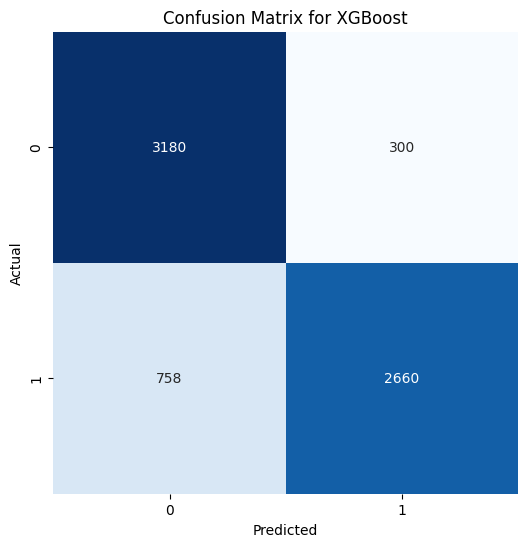

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
plot_confusion_matrix(y_test, xgb.predict(X_test_scaled), "XGBoost")


In [20]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Georgia']
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = '#DDDDDD'
plt.rcParams['grid.alpha'] = 0.6
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.frameon'] = False

models = results.columns.tolist()
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]  # Professional color palette
metric_colors = {
    'Accuracy': '#1f77b4',
    'Precision': '#2ca02c',
    'Recall': '#d62728',
    'F1-Score': '#9467bd'
}

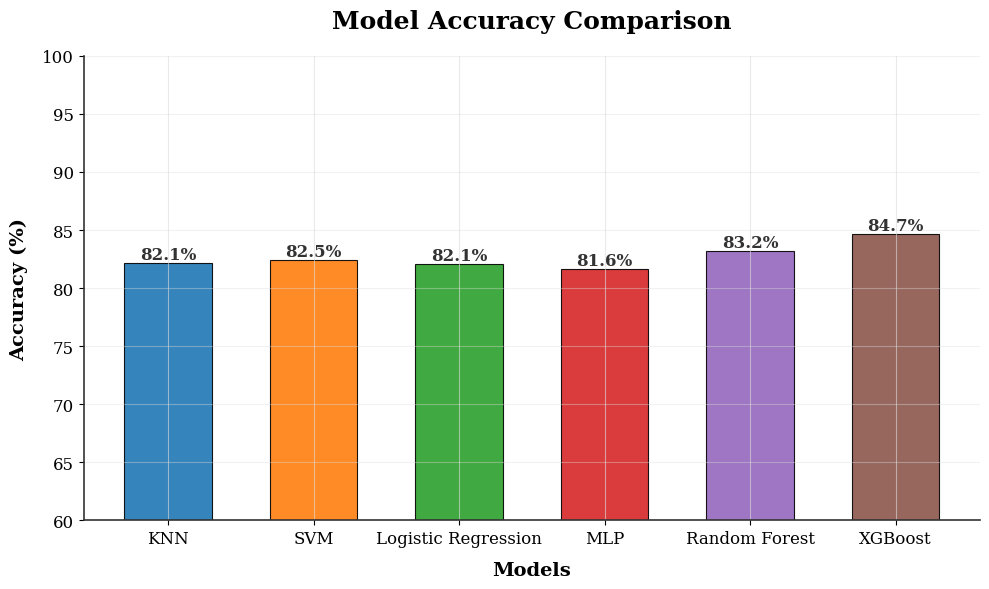

In [21]:
# Accuracy Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, results.loc['Accuracy'],
               color=colors[:len(models)],
               width=0.6,
               edgecolor='black',
               linewidth=0.8,
               alpha=0.9)

plt.gca().set_facecolor("#FFFFFF")
plt.grid(axis='y', alpha=0.4)
plt.ylim(60, 100)
plt.title("Model Accuracy Comparison", fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Models', fontsize=14, labelpad=10, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=14, labelpad=10, fontweight='bold')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom',
             fontsize=12,
             fontweight='bold',
             color='#333333')

plt.tight_layout()
plt.show()

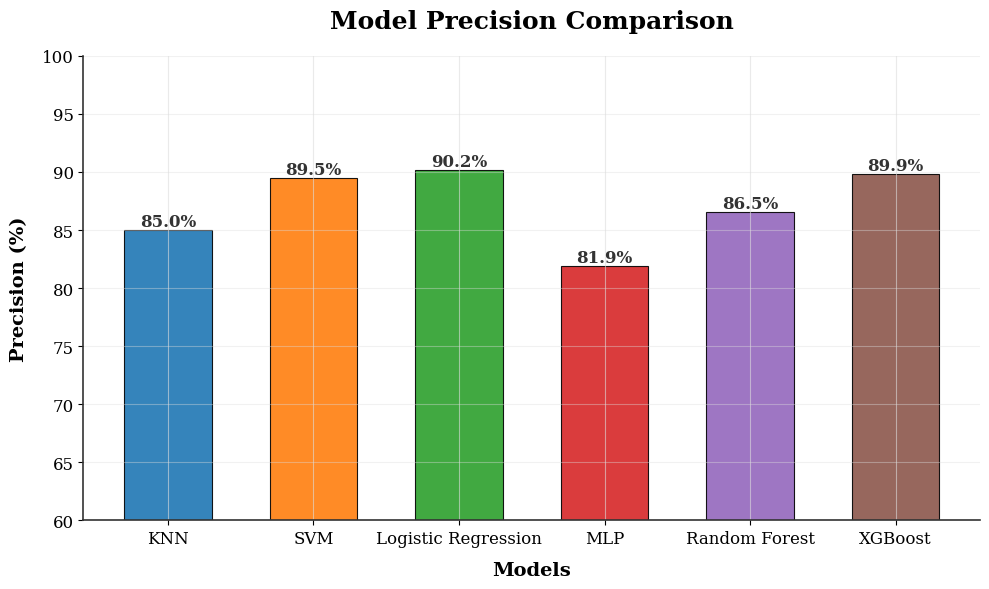

In [22]:
# Precision Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, results.loc['Precision'],
               color=colors[:len(models)],
               width=0.6,
               edgecolor='black',
               linewidth=0.8,
               alpha=0.9)

plt.gca().set_facecolor("#FFFFFF")
plt.grid(axis='y', alpha=0.4)
plt.ylim(60, 100)
plt.title("Model Precision Comparison", fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Models', fontsize=14, labelpad=10, fontweight='bold')
plt.ylabel('Precision (%)', fontsize=14, labelpad=10, fontweight='bold')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom',
             fontsize=12,
             fontweight='bold',
             color='#333333')

plt.tight_layout()
plt.show()

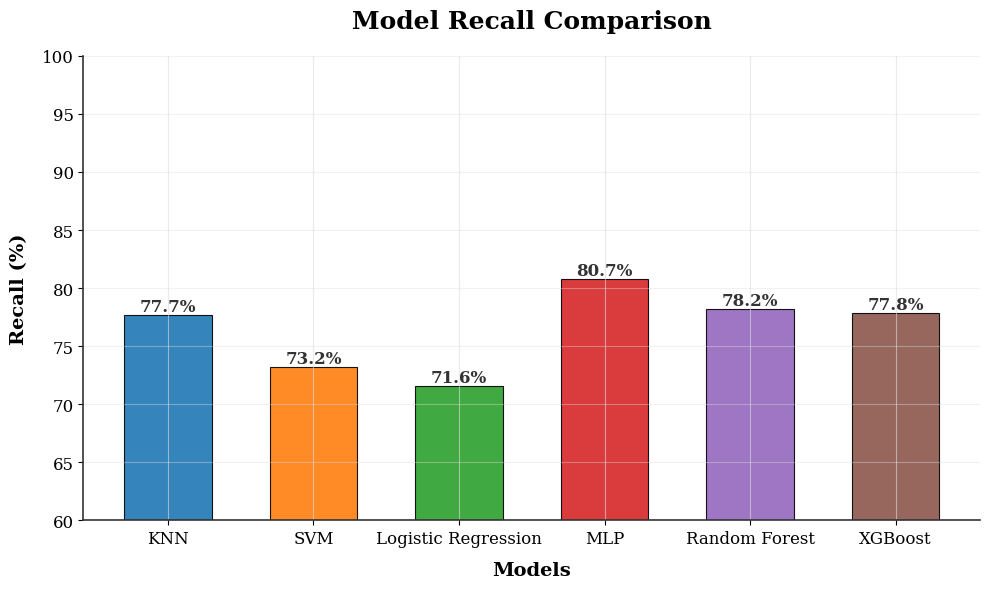

In [23]:
# Recall Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, results.loc['Recall'],
               color=colors[:len(models)],
               width=0.6,
               edgecolor='black',
               linewidth=0.8,
               alpha=0.9)

plt.gca().set_facecolor("#FFFFFF")
plt.grid(axis='y', alpha=0.4)
plt.ylim(60, 100)
plt.title("Model Recall Comparison", fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Models', fontsize=14, labelpad=10, fontweight='bold')
plt.ylabel('Recall (%)', fontsize=14, labelpad=10, fontweight='bold')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom',
             fontsize=12,
             fontweight='bold',
             color='#333333')

plt.tight_layout()
plt.show()

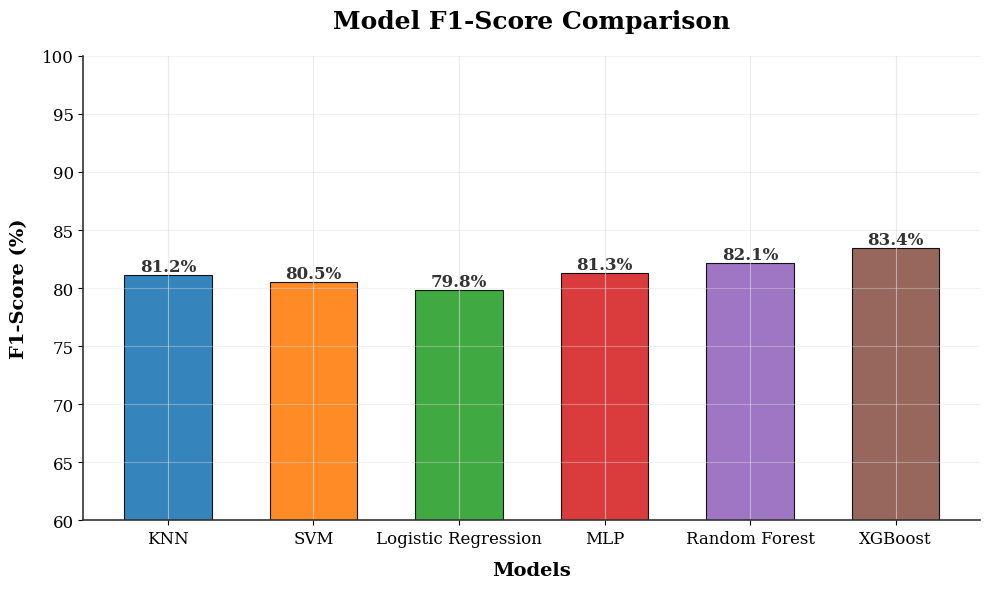

In [24]:
# F1-Score Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, results.loc['F1-Score'],
               color=colors[:len(models)],
               width=0.6,
               edgecolor='black',
               linewidth=0.8,
               alpha=0.9)

plt.gca().set_facecolor("#FFFFFF")
plt.grid(axis='y', alpha=0.4)
plt.ylim(60, 100)
plt.title("Model F1-Score Comparison", fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Models', fontsize=14, labelpad=10, fontweight='bold')
plt.ylabel('F1-Score (%)', fontsize=14, labelpad=10, fontweight='bold')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom',
             fontsize=12,
             fontweight='bold',
             color='#333333')

plt.tight_layout()
plt.show()

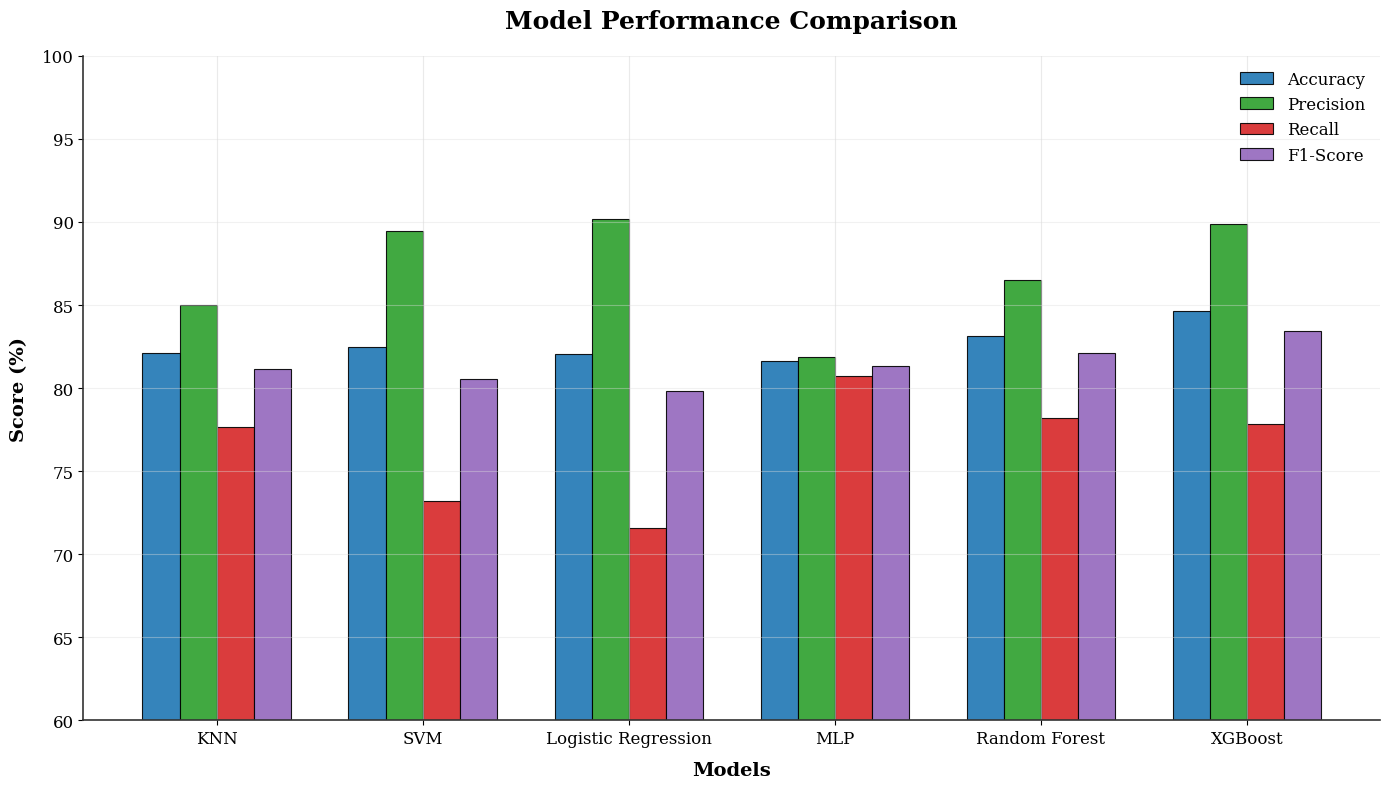

In [25]:
# Combined Metrics Plot
plt.figure(figsize=(14, 8))
x = np.arange(len(models))
width = 0.18

for idx, metric in enumerate(results.index):
    plt.bar(x + width*idx, results.loc[metric],
            width=width,
            label=metric,
            color=metric_colors[metric],
            edgecolor='black',
            linewidth=0.8,
            alpha=0.9)

plt.gca().set_facecolor("#FFFFFF")
plt.grid(axis='y', alpha=0.4)
plt.title("Model Performance Comparison", fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Models', fontsize=14, labelpad=10, fontweight='bold')
plt.ylabel('Score (%)', fontsize=14, labelpad=10, fontweight='bold')
plt.xticks(x + width*1.5, models, fontsize=12)
plt.ylim(60, 100)
plt.legend(loc='upper right', fontsize=12, frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()